In [3]:
import numpy as np
import os

import json
import sys

from tqdm import tqdm
config_file = "config_kdv_K_layer.json"

with open(config_file, "r") as f:
    config = json.load(f)["sin"]

data_path = config["data_settings"]["data_path"]
weights_path = config["nn_settings"]["weights_path"]
figures_path = config["data_settings"]["figures_path"]

# Check if the folder exists, if not, create it
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
    print(f"Directory {figures_path} created.")
else:
    print(f"Directory {figures_path} already exists.")

In [4]:
import matplotlib.pyplot as plt

# Controllability
If you have solved the tracking problems over different K settings and saved results by the corresponding file name, you can run the following code to see the comparison. 


In [5]:
results_dict_6 = np.load(os.path.join(data_path, "K_layer/klayer6.npy"), allow_pickle=True)
eig_value_6 = results_dict_6[()]["eigen_value"]
pk_opt_soln_mass_6 = results_dict_6[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_6 = results_dict_6[()]["pk_opt_soln_momentum"]

results_dict_12 = np.load(os.path.join(data_path, "K_layer/klayer12.npy"), allow_pickle=True)
eig_value_12 = results_dict_12[()]["eigen_value"]
pk_opt_soln_mass_12 = results_dict_12[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_12 = results_dict_12[()]["pk_opt_soln_momentum"]

results_dict_30 = np.load(os.path.join(data_path, "K_layer/klayer30.npy"), allow_pickle=True)
eig_value_30 = results_dict_30[()]["eigen_value"]
pk_opt_soln_mass_30 = results_dict_30[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_30 = results_dict_30[()]["pk_opt_soln_momentum"]
    
results_dict_36 = np.load(os.path.join(data_path, "K_layer/klayer36.npy"), allow_pickle=True)
eig_value_36 = results_dict_36[()]["eigen_value"]
pk_opt_soln_mass_36 = results_dict_36[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_36 = results_dict_36[()]["pk_opt_soln_momentum"]

2024-03-24 20:00:20.106069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 20:00:20.220259: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 20:00:20.828067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.10.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:
2024-03-24 20:00:20.828237: W tensorflow/compiler/xla/stre

In [6]:
ticks_font = 14

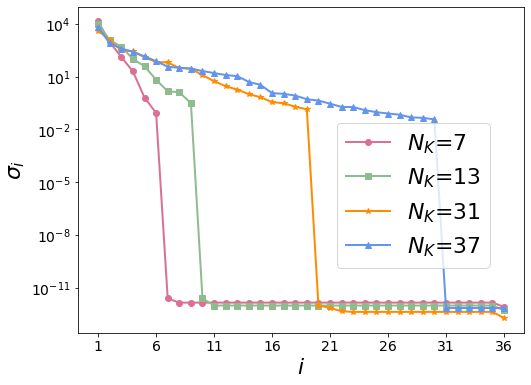

In [28]:
sigma_range = np.arange(1, 37)

# Eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(sigma_range, eig_value_6, linewidth=2, label=r"$N_{K}$=7", marker="o", color="palevioletred")
plt.plot(sigma_range, eig_value_12, linewidth=2, label=r"$N_{K}$=13", marker="s", color="darkseagreen")
plt.plot(sigma_range, eig_value_30, linewidth=2, label=r"$N_{K}$=31", marker="*", color="darkorange")
plt.plot(sigma_range, eig_value_36, linewidth=2, label=r"$N_{K}$=37", marker="^", color="cornflowerblue")

plt.yscale("log")

# custom_xticks = np.linspace(1, 169, 10)

total_ticks = 10
# start, end = 1, 30
# step = (end - start) // (total_ticks - 1)  # Calculate step to get roughly 10 ticks

# custom_xticks = np.arange(start, end + 1, step)
# custom_xticks[-1] = end  # Ensure the last tick is exactly 169

plt.xticks(np.arange(1, 37, step=5), fontsize=ticks_font)

# plt.xticks(custom_xticks, fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)

# plt.xlim(0,37)
# plt.ylim(1e-14, 1e5)
plt.xlabel(r"$i$", fontsize=22)
plt.ylabel(r"$\sigma_{i}$", fontsize=22)
plt.legend(fontsize=22, loc=(0.58, 0.2))


plt.savefig(os.path.join(figures_path, 'singular_values.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figures_path, 'singular_values.pdf'), dpi=200, bbox_inches='tight')


In [8]:
def check_index(eig_value):
    for i in range(eig_value.shape[0]-1):
        if eig_value[i+1] < 1e-5 and eig_value[i] > 1e-5:
            print(i)

In [9]:
check_index(eig_value_6)
check_index(eig_value_12)
check_index(eig_value_30)
check_index(eig_value_36)


5
8
18
29


In [10]:
eig_value_36.shape

(36,)

In [11]:
ref_dict = np.load(
    os.path.join(data_path, "K_layer/ref_dict.npy"), allow_pickle=True
)

mass_ref = ref_dict[()]["mass_ref"]
momentum_ref = ref_dict[()]["momentum_ref"]

In [12]:
ref_color = 'black'

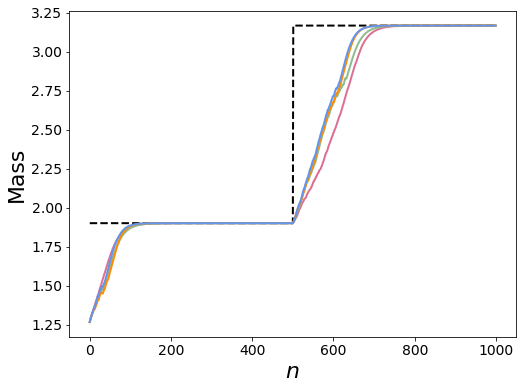

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(mass_ref, label="Reference", linestyle="--", color=ref_color, linewidth=2)

plt.plot(pk_opt_soln_mass_6, linewidth=2, label=r"$N_{K}$=6", color="palevioletred")
plt.plot(pk_opt_soln_mass_12, linewidth=2, label=r"$N_{K}$=12", color="darkseagreen")
plt.plot(pk_opt_soln_mass_30, linewidth=2, label=r"$N_{K}$=30", color="darkorange")
plt.plot(pk_opt_soln_mass_36, linewidth=2, label=r"$N_{K}$=36", color="cornflowerblue")

plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)


plt.xlabel(r"$n$", fontsize=22)
plt.ylabel("Mass", fontsize=22)
# plt.legend(fontsize=22)

plt.savefig(os.path.join(figures_path, 'pk_mass_klayers.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figures_path, 'pk_mass_klayers.pdf'), dpi=200, bbox_inches='tight')




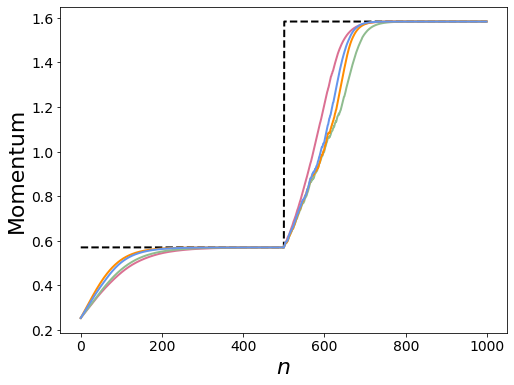

In [15]:

plt.figure(figsize=(8, 6))
plt.plot(momentum_ref, label="Reference", linestyle="--", color=ref_color, linewidth=2)

plt.plot(pk_opt_soln_momentum_6, linewidth=2, label=r"$N_{K}$=6", color="palevioletred")
plt.plot(pk_opt_soln_momentum_12, linewidth=2, label=r"$N_{K}$=12", color="darkseagreen")
plt.plot(pk_opt_soln_momentum_30, linewidth=2, label=r"$N_{K}$=30", color="darkorange")
plt.plot(pk_opt_soln_momentum_36, linewidth=2, label=r"$N_{K}$=36", color="cornflowerblue")


plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)

plt.xlabel(r"$n$", fontsize=22)
plt.ylabel("Momentum", fontsize=22)
# plt.legend(fontsize=22)

plt.savefig(os.path.join(figures_path, 'pk_momentum_klayers.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figures_path, 'pk_momentum_klayers.pdf'), dpi=200, bbox_inches='tight')


